In [31]:
#Import all the necessary packages
from pandas import Series, DataFrame
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from patsy import dmatrices
import warnings
import seaborn as sns
import xgboost as xgb
from xgboost import plot_tree
%pylab inline
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


# Decision Tree

In [2]:
#Import the training set
train = pd.read_csv("train.csv")
train.head()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,insulin,change,...,diag_2_Respiratory,diag_3_Diabetes,diag_3_Digestive,diag_3_Genitourinary,diag_3_Injury,diag_3_Musculoskeletal,diag_3_Other,diag_3_Respiratory,LDA1,readmitted
0,1.0,41.0,2.0,7.0,0.0,0.0,0.0,9.0,0,0,...,0,0,0,0,0,0,1,0,-0.682073,0
1,3.0,37.0,0.0,6.0,0.0,0.0,0.0,3.0,0,0,...,0,0,0,0,0,0,0,1,-0.595305,0
2,10.0,31.0,3.0,53.0,0.0,0.0,0.0,9.0,1,1,...,0,0,0,0,0,0,1,0,-0.323497,0
3,3.5,51.0,0.0,7.0,2.0,0.0,0.5,6.5,0,0,...,0,1,0,0,0,0,0,0,0.460290,1
4,13.0,51.0,2.0,40.0,0.0,0.0,1.0,9.0,1,1,...,1,0,0,0,0,0,1,0,1.089305,0


In [3]:
#Get a list of all column names besides the predictor "readmitted" column
column_headers = train.columns.values.tolist()
column_headers = column_headers[:-1]

In [4]:
#Set the x and y training sets
X_train = train[column_headers]
y_train = train['readmitted']

In [5]:
#Import the test set
test = pd.read_csv("test.csv")
test.head()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,insulin,change,...,diag_2_Respiratory,diag_3_Diabetes,diag_3_Digestive,diag_3_Genitourinary,diag_3_Injury,diag_3_Musculoskeletal,diag_3_Other,diag_3_Respiratory,LDA1,readmitted
0,4.0,2.0,0.0,6.0,0.0,0.0,0.0,5.0,0,0,...,0,0,0,0,0,0,0,0,-0.830611,0
1,2.0,31.0,1.0,20.0,0.0,0.0,0.0,5.0,1,1,...,0,0,0,0,0,0,1,0,-0.566017,0
2,1.0,66.0,0.0,7.0,0.0,0.0,0.0,6.0,1,1,...,0,0,0,0,0,0,1,0,-0.397217,0
3,9.0,42.0,0.0,9.0,0.0,0.0,0.0,5.0,1,0,...,0,1,0,0,0,0,0,0,-0.500070,1
4,3.0,49.0,0.0,10.0,0.0,0.0,0.0,8.0,1,0,...,0,0,0,0,0,0,0,0,-0.474938,0


In [6]:
#Set the x and y test sets
X_test = test[column_headers]
y_test = test['readmitted']

In [7]:
#Import the decision tree package and set the class weights as discussed in the group meeting
from sklearn import tree
model = tree.DecisionTreeClassifier(criterion='entropy', class_weight={0:1,1:2})

In [8]:
#Fit the model
result = model.fit(X_train, y_train)

In [9]:
#Print the accuracy score on the training set
from sklearn import metrics

prediction_train = model.predict(X_train)
print(metrics.accuracy_score(y_train, prediction_train))

1.0


In [10]:
#Print the accuracy score on the test set
prediction = model.predict(X_test)
print(metrics.accuracy_score(y_test, prediction))

0.6955938920620119


### Since the above decision tree is overfit, I have made another one below with a max_depth of 2

In [11]:
#Run the decision tree again with a depth of two to improve accuracy and avoid overfitting
model2 = tree.DecisionTreeClassifier(criterion='entropy', max_depth=2)
result = model2.fit(X_train, y_train)

In [12]:
#Print the accuracy on the training set
prediction_train = model2.predict(X_train)
print(metrics.accuracy_score(y_train, prediction_train))

0.7706475491053214


In [13]:
#Print the accuracy on the test set
prediction = model2.predict(X_test)
print(metrics.accuracy_score(y_test, prediction))

0.7689124606597506


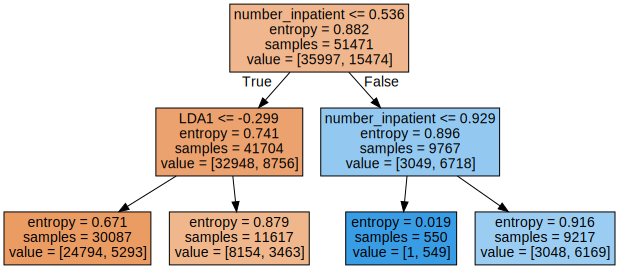

In [14]:
#Visually display the decision tree
import graphviz
graphviz.Source(tree.export_graphviz(model2,
                                     out_file=None,
                                     feature_names=X_train.columns.values,
                                     filled=True))

# Random Forest

In [17]:
#Implement and fit the model then run
#Made n_estimators = 100 so we can have an accurate prediction, can lower it for computation time
rfr = RandomForestRegressor(n_estimators = 100, random_state = 13)        
rfr.fit(X_train,y_train)
y_predict = rfr.predict(X_test)

In [18]:
#Display accuracy metrics for the random forest
print('Random Forest Regressor:')
print()
print('Accuracy:',rfr.score(X_test, y_test)*100)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predict))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predict))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

Random Forest Regressor:

Accuracy: 17.555826925672847
Mean Absolute Error: 0.31457046275789724
Mean Squared Error: 0.17260403310409136
Root Mean Squared Error: 0.4154564154085135


# XGBoost 
#### Link used: https://stackoverflow.com/questions/51323595/plot-a-single-xgboost-decision-tree

In [40]:
#Import and initialize the XGB model
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(X_train,y_train)

#Make predictions and print accuracy metrics
predictions = xgb_classifier.predict(X_test)
print("Accuracy of Model::",accuracy_score(y_test,predictions))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Accuracy of Model:: 0.791525818860007
Mean Absolute Error: 0.208474181139993
Mean Squared Error: 0.208474181139993
Root Mean Squared Error: 0.4565897295603494


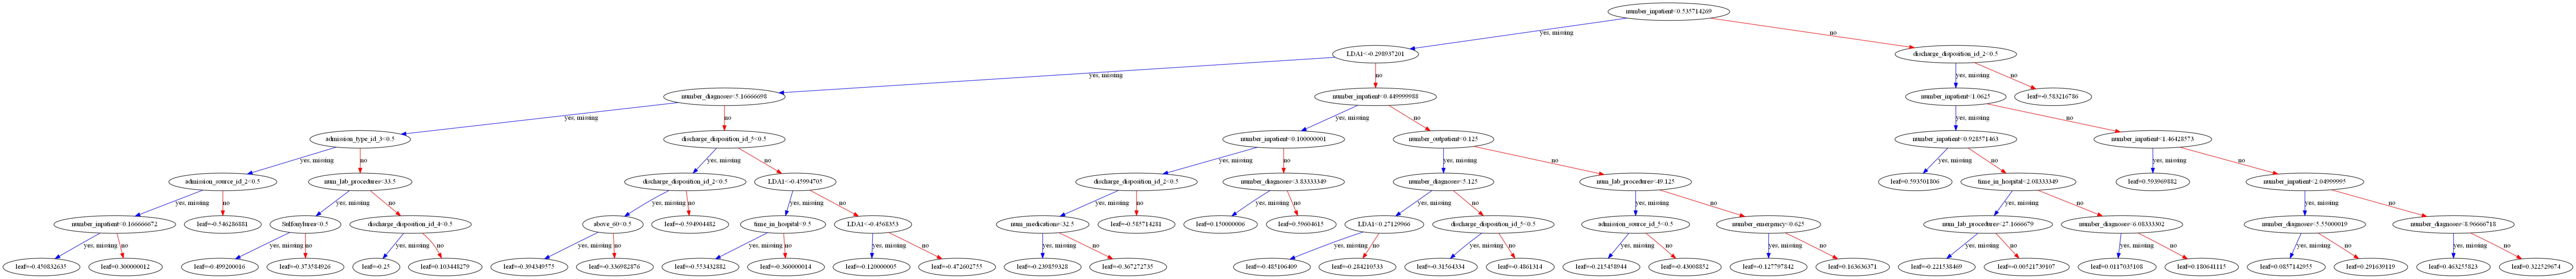

In [37]:
#Visualize
fig, ax = plt.subplots(figsize=(30, 30))
xgb.plot_tree(xgb_classifier, ax=ax)
plt.show()